# Модуль 5. Классификация и регрессия


## 2. Методы классификации: деревья решений, логистическая регрессия, SVM


### 2. Логистическая регрессия: принцип работы


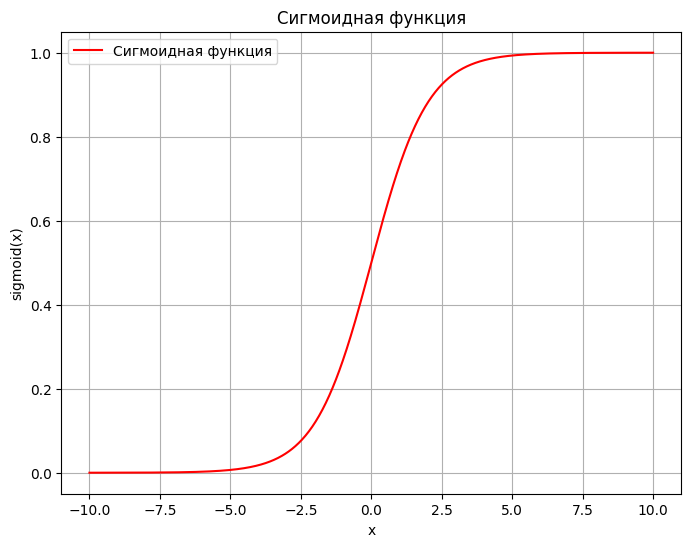

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


x = np.linspace(-10, 10, 1000)
y = sigmoid(x)

plt.figure(figsize=(8, 6))
plt.plot(x, y, "-r", label="Сигмоидная функция")
plt.title("Сигмоидная функция")
plt.xlabel("x")
plt.ylabel("sigmoid(x)")
plt.grid()
plt.legend(loc="upper left")
plt.savefig("sigmoid_function.png", dpi=300)
plt.show()

```
Загрузит набор данных iris.
Выделяет только два класса (Setosa и Versicolor) и две характеристики (длину и ширину чашелистика).
Разделяет данные на тренировочный и тестовый наборы.
Обучает модель логистической регрессии.
Оценивает точность модели на тестовом наборе.
Визуализирует границу решения модели на двумерном графике.
На графике разделительную линию, определенную моделью логистической регрессии, и точки данных на графике, представляющие собой разные классы цветков.
```


Точность: 1.0


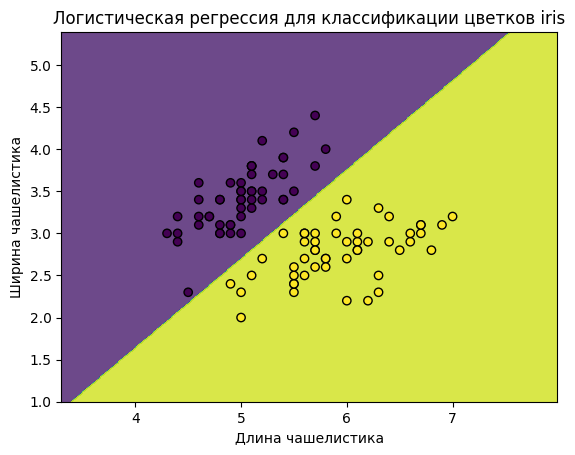

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Загрузка набора данных
iris = datasets.load_iris()
X = iris.data[:100, :2]  # берем только первые два класса и две характеристики
y = iris.target[:100]

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Обучение модели
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred = clf.predict(X_test)
print("Точность:", accuracy_score(y_test, y_pred))

# Визуализация
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", marker="o")
plt.xlabel("Длина чашелистика")
plt.ylabel("Ширина чашелистика")
plt.title("Логистическая регрессия для классификации цветков iris")
plt.savefig("sigmoid_function.png", dpi=300)
plt.show()

### 3. Метод опорных векторов (SVM): основы


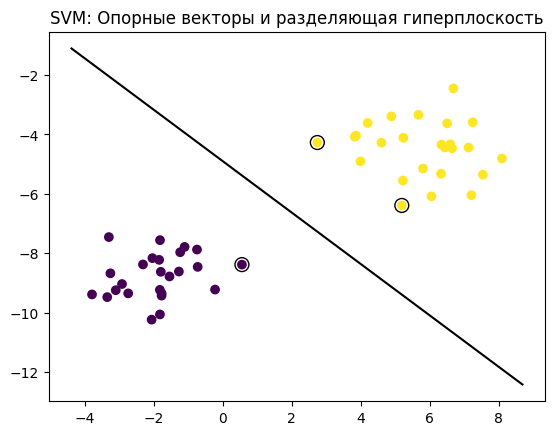

In [8]:
# Этот код создает график с двумя кластерами данных и показывает разделяющую гиперплоскость и опорные векторы.
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

# Загрузка данных
X, y = datasets.make_blobs(
    n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40
)

# Обучение SVM
clf = SVC(kernel="linear")
clf.fit(X, y)

# График
plt.scatter(X[:, 0], X[:, 1], c=y)
ax = plt.gca()
xlim = ax.get_xlim()
xx = np.linspace(xlim[0], xlim[1])
yy = -(clf.coef_[0][0] * xx + clf.intercept_[0]) / clf.coef_[0][1]
plt.plot(xx, yy, "k-")
plt.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    facecolors="none",
    edgecolors="k",
)
plt.title("SVM: Опорные векторы и разделяющая гиперплоскость")
plt.savefig("svm_illustration.png")
plt.show()

## 3. Методы регрессии: линейная регрессия, полиномиальная регрессия

### 1. Линейная регрессия: основы и формулы


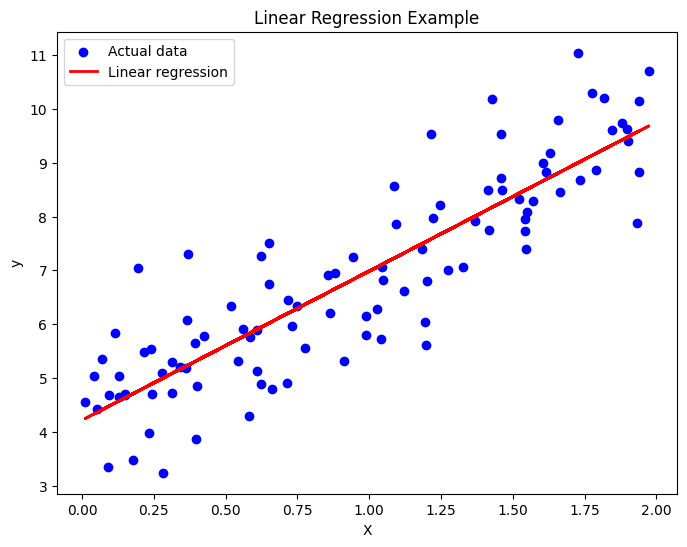

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Создаем набор данных
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Обучаем модель линейной регрессии
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)

# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color="blue", label="Actual data")
plt.plot(X, y_pred, color="red", linewidth=2, label="Linear regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression Example")
plt.savefig("linear_regression_example.png")
plt.show()

### 2. Полиномиальная регрессия: принцип работы


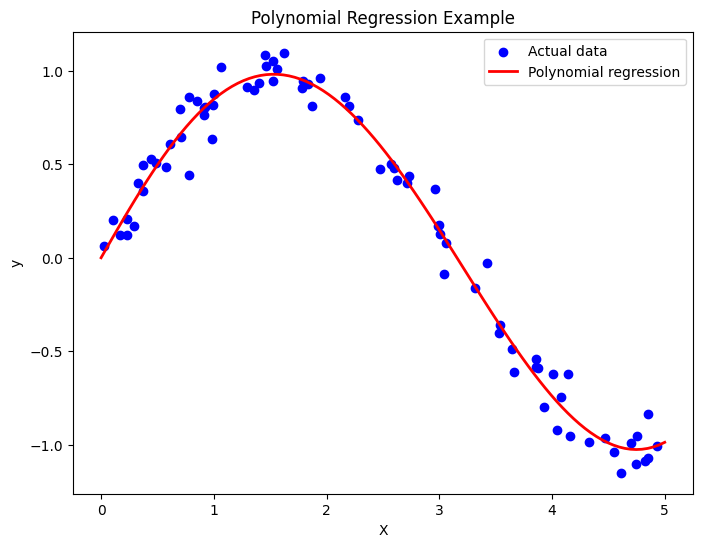

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Создаем набор данных
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.randn(80) * 0.1

# Обучаем модель полиномиальной регрессии
poly_features = PolynomialFeatures(degree=5, include_bias=False)
X_poly = poly_features.fit_transform(X)
lin_reg = LinearRegression().fit(X_poly, y)

# Предсказываем значения
X_new = np.linspace(0, 5, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color="blue", label="Actual data")
plt.plot(X_new, y_new, color="red", linewidth=2, label="Polynomial regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Polynomial Regression Example")
plt.savefig("polynomial_regression_example.png")
plt.show()

### 3. Выбор степени полинома


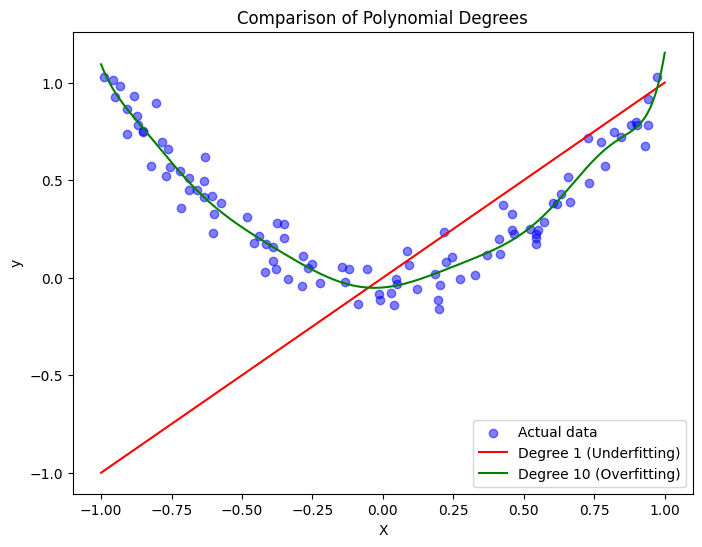

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Создаем набор данных
np.random.seed(42)
X = 2 * np.random.rand(100, 1) - 1
y = X**2 + 0.1 * np.random.randn(100, 1)

# Создаем кривые для разных степеней
X_line = np.linspace(-1, 1, 400).reshape(-1, 1)
y_line_1 = X_line
y_line_10 = np.polyval(np.polyfit(X.ravel(), y.ravel(), 10), X_line)

# Построение графика
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color="blue", label="Actual data", alpha=0.5)
plt.plot(X_line, y_line_1, color="red", label="Degree 1 (Underfitting)")
plt.plot(X_line, y_line_10, color="green", label="Degree 10 (Overfitting)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Comparison of Polynomial Degrees")
plt.savefig("polynomial_regression_comparison.png")
plt.show()

### 5. Оценка качества моделей регрессии


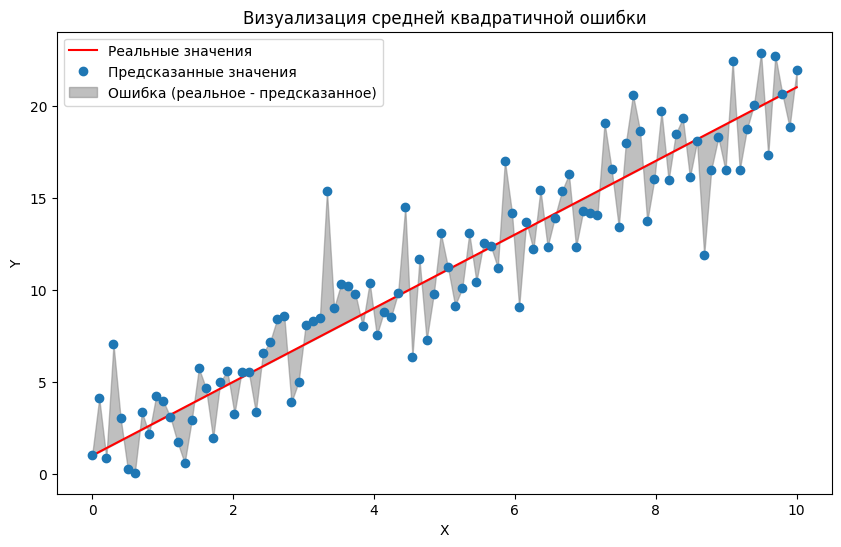

In [4]:
# Код для генерации иллюстрации средней квадратичной ошибки
import numpy as np
import matplotlib.pyplot as plt

# Генерация простых данных
X = np.linspace(0, 10, 100)
Y_real = 2 * X + 1
Y_pred = 2 * X + 1 + np.random.normal(0, 2, len(X))

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(X, Y_real, "-r", label="Реальные значения")
plt.plot(X, Y_pred, "o", label="Предсказанные значения")
plt.fill_between(
    X,
    Y_real,
    Y_pred,
    color="gray",
    alpha=0.5,
    label="Ошибка (реальное - предсказанное)",
)
plt.legend()
plt.title("Визуализация средней квадратичной ошибки")
plt.xlabel("X")
plt.ylabel("Y")
plt.savefig("mse_visualization.png")
plt.show()

## 4. Введение в ансамблевые методы

### 1. Основы ансамблевых методов


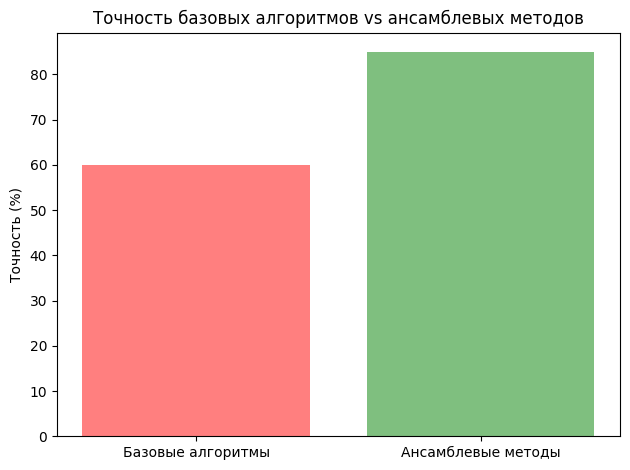

In [6]:
import matplotlib.pyplot as plt
import numpy as np

labels = ["Базовые алгоритмы", "Ансамблевые методы"]
performance = [60, 85]  # Произвольные значения точности моделей

y = np.arange(len(labels))

plt.bar(y, performance, align="center", alpha=0.5, color=["red", "green"])
plt.xticks(y, labels)
plt.ylabel("Точность (%)")
plt.title("Точность базовых алгоритмов vs ансамблевых методов")

plt.tight_layout()
plt.savefig("comparison_chart.png")
plt.show()

### 2. Принципы работы ансамблей


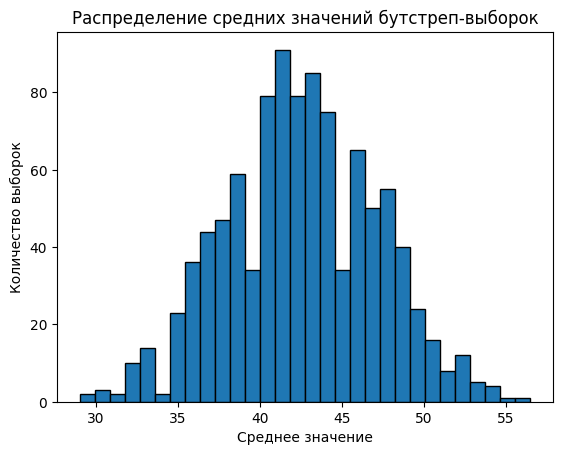

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Задаем начальный набор данных
data = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65]

# Количество бутстреп-выборок
n_bootstrap_samples = 1000

# Сюда будем сохранять средние значения для каждой выборки
bootstrap_means = []

for _ in range(n_bootstrap_samples):
    # Выбираем данные со возвратом и вычисляем среднее значение
    bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))

# Визуализируем результат
plt.hist(bootstrap_means, bins=30, edgecolor="black")
plt.title("Распределение средних значений бутстреп-выборок")
plt.xlabel("Среднее значение")
plt.ylabel("Количество выборок")
plt.savefig("comparison_bootstrap.png")
plt.show()

## 5. Bagging и Bootstrapped Aggregation

### 3. Примеры использования


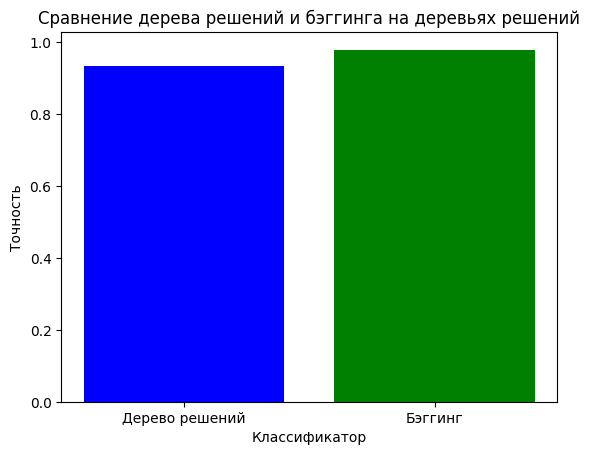

In [15]:
# Импорт библиотек
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# Загрузка данных
data = load_wine()
X = data.data
y = data.target

# Разбиение данных
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Дерево решений без Bagging
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred_tree = clf.predict(X_test)

# Применяем Bagging
bag_clf = BaggingClassifier(
    estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42
)
bag_clf.fit(X_train, y_train)
y_pred_bag = bag_clf.predict(X_test)

# Оцениваем качество
acc_tree = accuracy_score(y_test, y_pred_tree)
acc_bag = accuracy_score(y_test, y_pred_bag)

# Визуализация результатов
labels = ["Дерево решений", "Бэггинг"]
accuracy = [acc_tree, acc_bag]

plt.bar(labels, accuracy, color=["blue", "green"])
plt.xlabel("Классификатор")
plt.ylabel("Точность")
plt.savefig("comparison_bagging.png")
plt.title("Сравнение дерева решений и бэггинга на деревьях решений")
plt.show()

### 4. Сравнение с другими ансамблевыми методами


Для визуализации сравнения между Bagging и Boosting, давайте используем датасет "wine" из библиотеки sklearn.datasets. В этом датасете классификация проводится по химическим характеристикам вина на три категории.

Для Bagging мы будем использовать BaggingClassifier со вложенным внутри деревом решений. Для Boosting мы будем использовать GradientBoostingClassifier.

Построим графики зависимости точности от количества базовых моделей (деревьев) для обоих методов. Это поможет нам увидеть, как изменяется точность с увеличением числа деревьев в Bagging и Boosting.


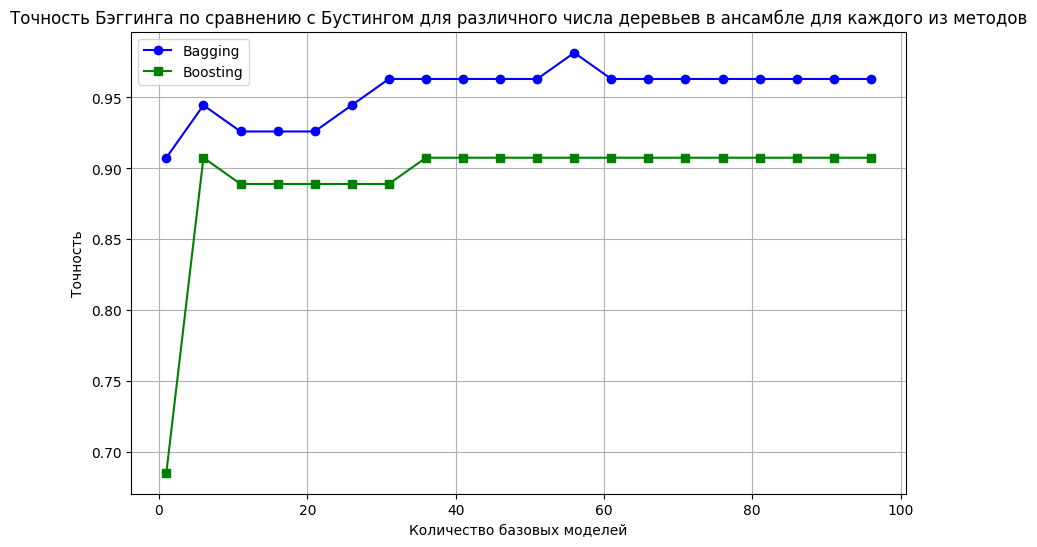

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Загрузка датасета
data = load_wine()
X = data.data
y = data.target

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Создаем списки для сохранения точности
bagging_accuracies = []
boosting_accuracies = []

# Диапазон количества моделей
estimators_range = np.arange(1, 101, 5)

# Вычисляем точность для каждого количества моделей
for n_estimators in estimators_range:
    bagging_clf = BaggingClassifier(
        estimator=DecisionTreeClassifier(), n_estimators=n_estimators, random_state=42
    )
    bagging_clf.fit(X_train, y_train)
    bagging_pred = bagging_clf.predict(X_test)
    bagging_accuracies.append(accuracy_score(y_test, bagging_pred))

    boosting_clf = GradientBoostingClassifier(
        n_estimators=n_estimators, random_state=42
    )
    boosting_clf.fit(X_train, y_train)
    boosting_pred = boosting_clf.predict(X_test)
    boosting_accuracies.append(accuracy_score(y_test, boosting_pred))

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(estimators_range, bagging_accuracies, "o-", color="blue", label="Bagging")
plt.plot(estimators_range, boosting_accuracies, "s-", color="green", label="Boosting")
plt.xlabel("Количество базовых моделей")
plt.ylabel("Точность")
plt.title(
    "Точность Бэггинга по сравнению с Бустингом для различного числа деревьев в ансамбле для каждого из методов"
)
plt.legend()
plt.grid(True)

# Сохранение изображения
plt.savefig("dynamic_comparison_bagging_boosting.png")
plt.show()

## 6. AdaBoost и Gradient Boosting

### 5. Примеры успешных применений


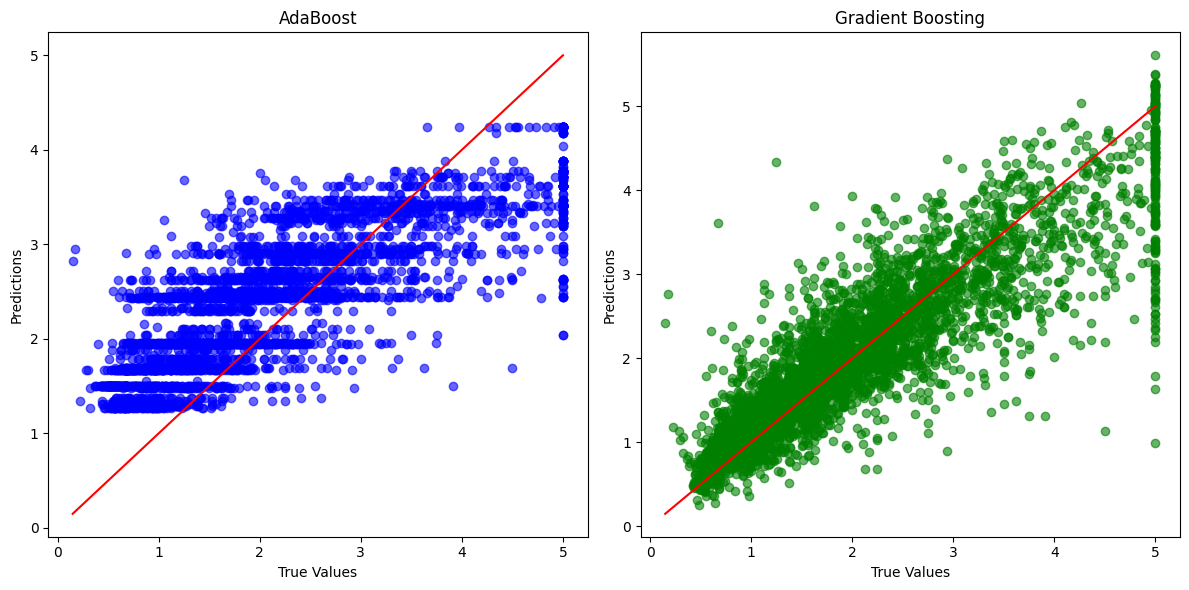

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

# Fetch the dataset
california = fetch_california_housing()
X = california.data
y = california.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the models
ada = AdaBoostRegressor(n_estimators=100, random_state=42)
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
gb.fit(X_train, y_train)

# Make predictions
y_pred_ada = ada.predict(X_test)
y_pred_gb = gb.predict(X_test)

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_ada, color="blue", alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red")
plt.title("AdaBoost")
plt.xlabel("True Values")
plt.ylabel("Predictions")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_gb, color="green", alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red")
plt.title("Gradient Boosting")
plt.xlabel("True Values")
plt.ylabel("Predictions")

plt.tight_layout()
plt.savefig("comparison_california.png")
plt.show()

## 7. XGBoost, LightGBM, CatBoost: сравнение и применение


### 5. Применение на практике


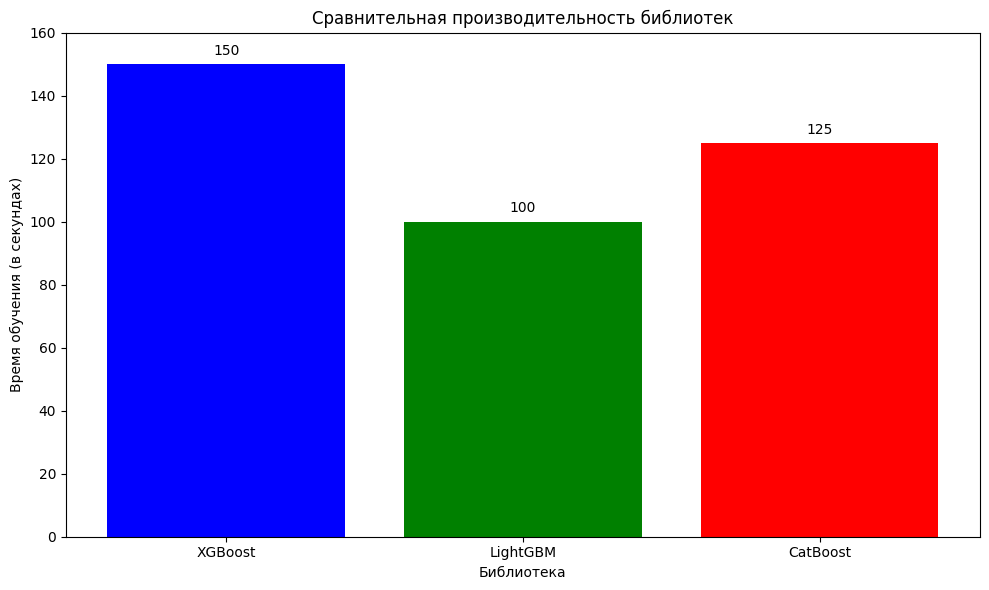

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Примерные данные по производительности (время обучения в секундах)
libraries = ["XGBoost", "LightGBM", "CatBoost"]
performance = [150, 100, 125]

plt.figure(figsize=(10, 6))
bars = plt.bar(libraries, performance, color=["blue", "green", "red"])
plt.xlabel("Библиотека")
plt.ylabel("Время обучения (в секундах)")
plt.title("Сравнительная производительность библиотек")
plt.ylim(0, max(performance) + 10)

# Выводим значения над столбцами
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval + 2,
        round(yval, 2),
        ha="center",
        va="bottom",
        color="black",
    )

plt.tight_layout()
plt.savefig("libraries_comparison.png")
plt.show()

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt

# Загрузка датасета
data = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",
    sep=";",
)

# Разбивка данных на обучающую и тестовую выборки
X = data.drop("quality", axis=1)
y = data["quality"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Обучение XGBoost
xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
xgb_rmse = mean_squared_error(y_test, xgb_preds, squared=False)

# Обучение LightGBM
lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train, y_train)
lgb_preds = lgb_model.predict(X_test)
lgb_rmse = mean_squared_error(y_test, lgb_preds, squared=False)

c:\git\MUIV\quests\.venv\lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
c:\git\MUIV\quests\.venv\lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
c:\git\MUIV\quests\.venv\lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
c:\git\MUIV\quests\.venv\lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_categorical_dtype(dtype)
c

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000993 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1019
[LightGBM] [Info] Number of data points in the train set: 1279, number of used features: 11
[LightGBM] [Info] Start training from score 5.623925


C:\Users\inimatic\AppData\Local\Temp\ipykernel_1496\1012327289.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="red")
C:\Users\inimatic\AppData\Local\Temp\ipykernel_1496\1012327289.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color="red")


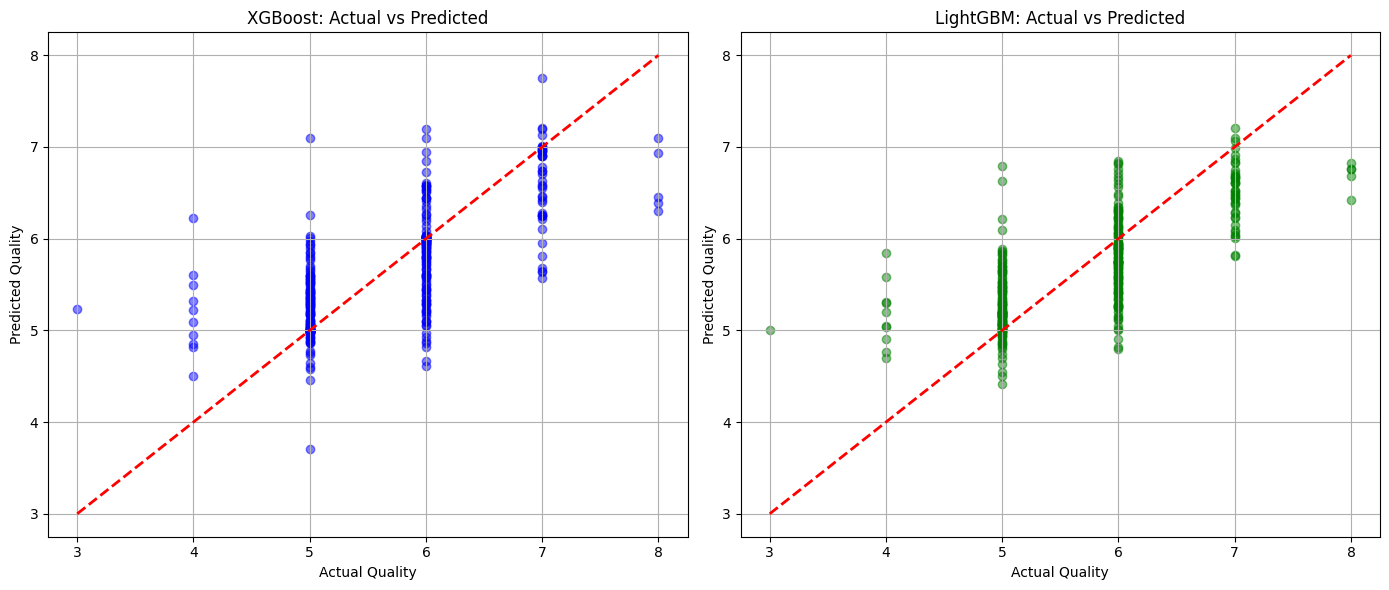

In [11]:
plt.figure(figsize=(14, 6))

# XGBoost
plt.subplot(1, 2, 1)
plt.scatter(y_test, xgb_preds, alpha=0.5, color="blue")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=2, color="red")
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("XGBoost: Actual vs Predicted")
plt.grid(True)

# LightGBM
plt.subplot(1, 2, 2)
plt.scatter(y_test, lgb_preds, alpha=0.5, color="green")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "k--", lw=2, color="red")
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("LightGBM: Actual vs Predicted")
plt.grid(True)

plt.tight_layout()
plt.savefig("xgboost_vs_lightgbm_scatter.png")
plt.show()

## 8. Метрики качества для классификации и регрессии

### 1. Основные метрики для классификации


https://loginom.ru/blog/logistic-regression-roc-auc


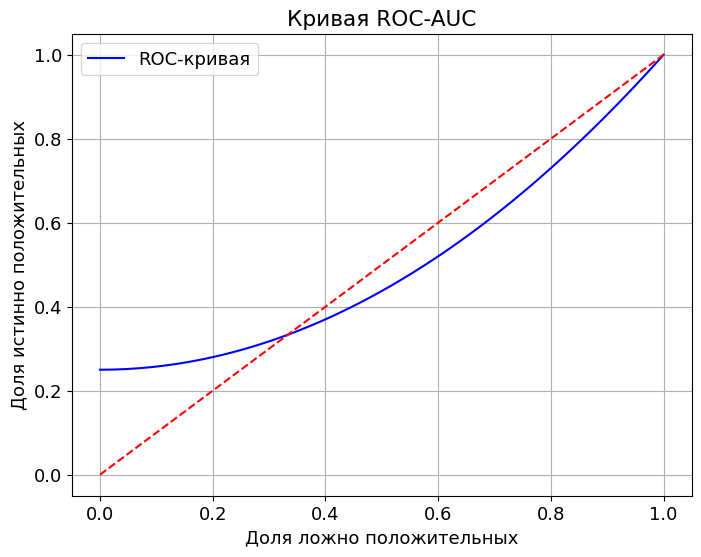

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Генерируем случайные данные для ROC кривой
fpr = np.linspace(0, 1, 100)
tpr = 0.75 * fpr**2 + 0.25

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC-кривая", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="red")
plt.title("Кривая ROC-AUC")
plt.xlabel("Доля ложно положительных")
plt.ylabel("Доля истинно положительных")
plt.legend()
plt.grid(True)
plt.savefig("roc_auc_example.png")
plt.show()

C:\Users\inimatic\AppData\Local\Temp\ipykernel_5896\8238357.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + ['Позитивные', 'Негативные'])
C:\Users\inimatic\AppData\Local\Temp\ipykernel_5896\8238357.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + ['Позитивные', 'Негативные'])


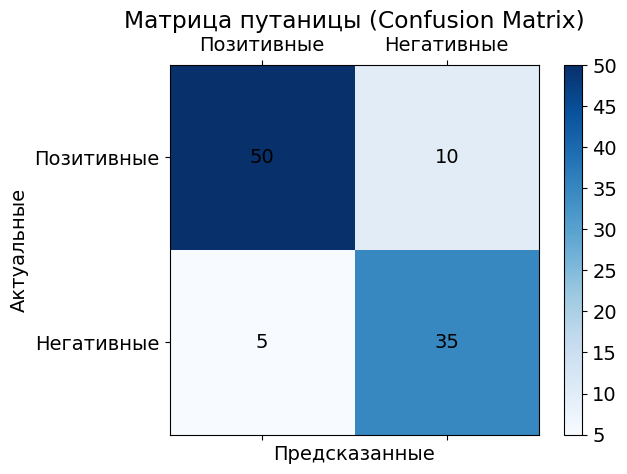

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация иллюстрации для матрицы ошибок
labels = ["True Positive", "False Negative", "False Positive", "True Negative"]
values = np.array([[50, 10], [5, 35]])

fig, ax = plt.subplots()
cax = ax.matshow(values, cmap="Blues")
plt.colorbar(cax)

for i in range(2):
    for j in range(2):
        ax.text(j, i, str(values[i, j]), va="center", ha="center", fontsize=14)

ax.set_xticklabels([""] + ["Позитивные", "Негативные"])
ax.set_yticklabels([""] + ["Позитивные", "Негативные"])
ax.set_xlabel("Предсказанные")
ax.set_ylabel("Актуальные")
plt.title("Матрица путаницы (Confusion Matrix)")
plt.rcParams.update({"font.size": 13})
plt.savefig("confusion_matrix.png", dpi=300, bbox_inches="tight")
plt.show()

### 2. Основные метрики для регрессии


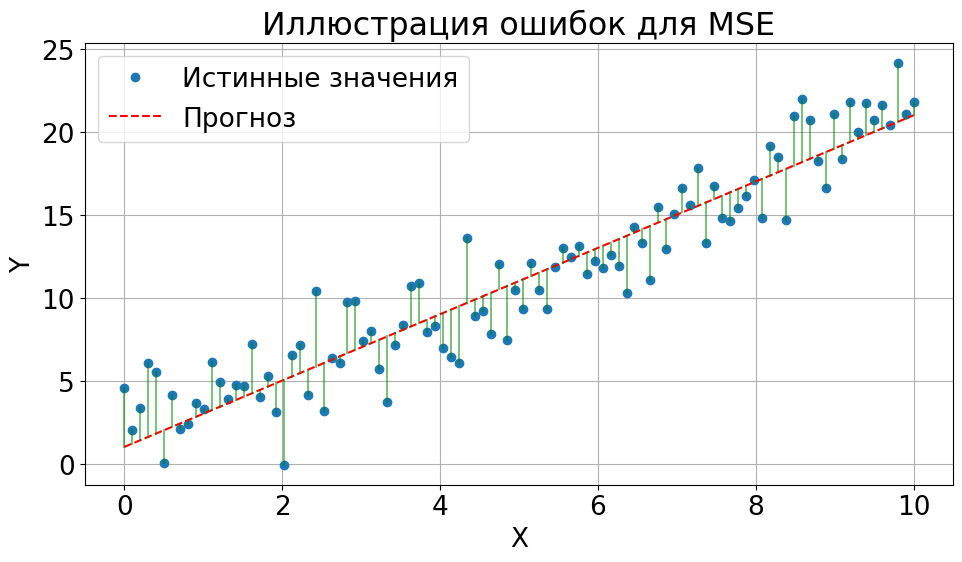

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Генерация данных
np.random.seed(0)
x = np.linspace(0, 10, 100)
y = 2 * x + 1 + np.random.normal(0, 2, size=100)

# Простая линейная регрессия
y_pred = 2 * x + 1

# Генерация иллюстрации
plt.figure(figsize=(10, 6))
plt.plot(x, y, "o", label="Истинные значения")
plt.plot(x, y_pred, "--r", label="Прогноз")
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y[i], y_pred[i]], "g-", alpha=0.5)

plt.title("Иллюстрация ошибок для MSE")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.rcParams.update({"font.size": 19})
plt.savefig("mse_illustration.png", dpi=300)
plt.show()

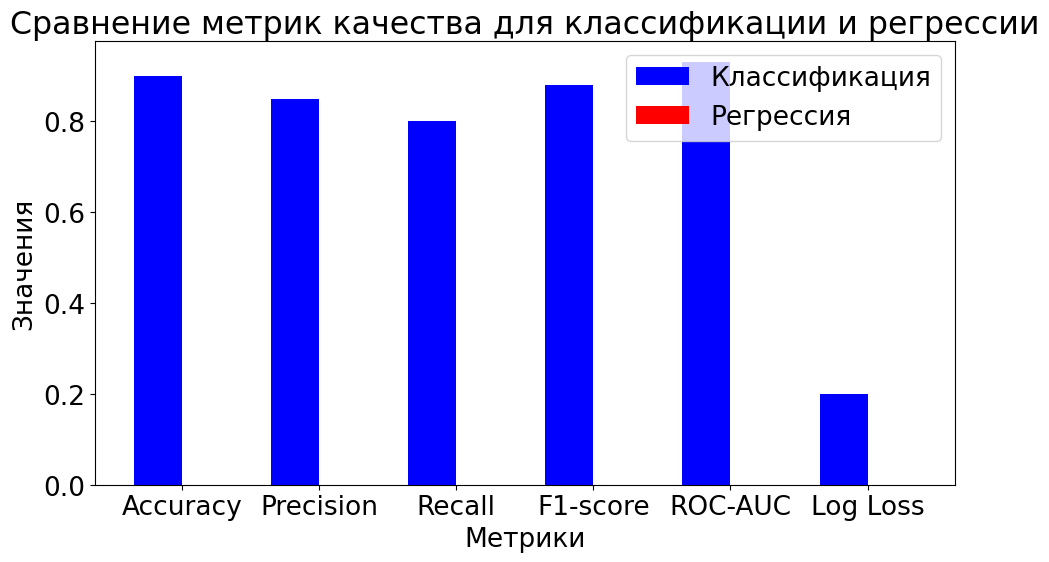

In [5]:
import matplotlib.pyplot as plt
import numpy as np

labels = ["Accuracy", "Precision", "Recall", "F1-score", "ROC-AUC", "Log Loss"]
classification_values = [0.9, 0.85, 0.8, 0.88, 0.93, 0.2]
regression_values = [
    0,
    0,
    0,
    0,
    0,
    0,
]  # We'll display zero as these metrics aren't used for regression

bar_width = 0.35
index = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(
    index,
    classification_values,
    bar_width,
    label="Классификация",
    color="b",
    align="center",
)
bar2 = ax.bar(
    index + bar_width,
    regression_values,
    bar_width,
    label="Регрессия",
    color="r",
    align="center",
)

ax.set_xlabel("Метрики")
ax.set_ylabel("Значения")
ax.set_title("Сравнение метрик качества для классификации и регрессии")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(labels)
ax.legend()
plt.rcParams.update({"font.size": 19})
plt.tight_layout()
plt.savefig("metrics_comparison.png")
plt.show()

### 5. ROC-кривая и AUC


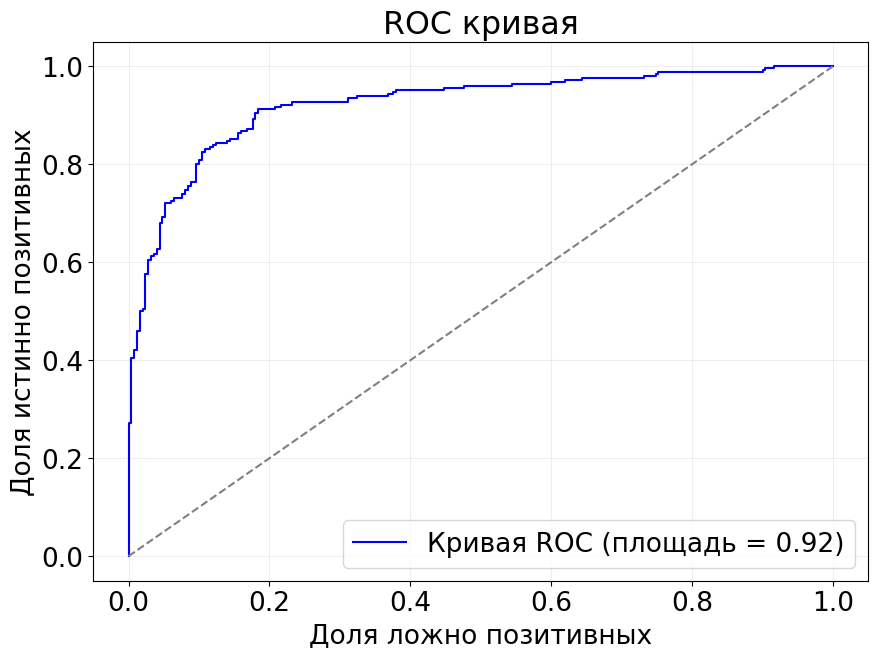

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

plt.rcParams.update({"font.size": 19})

# Генерируем случайный набор данных
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=42
)

# Обучаем модель
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_score = clf.decision_function(X_test)

# ROC-кривая
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# График
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color="blue", label=f"Кривая ROC (площадь = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("Доля ложно позитивных")
plt.ylabel("Доля истинно позитивных")
plt.title("ROC кривая")
plt.legend(loc="lower right")
plt.grid(alpha=0.2)

# Сохраняем изображение
plt.savefig("roc_curve_plot.png", dpi=300)

## 9. Переобучение и регуляризация

### 1. Определение переобучения


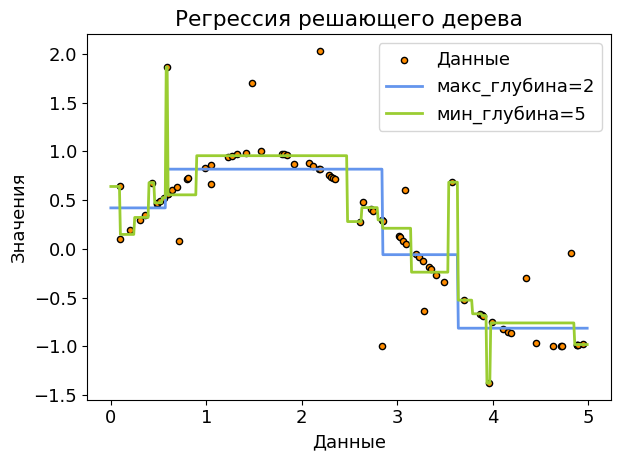

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Создаем данные
np.random.seed(0)
x = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(x).ravel()
y[::5] += 3 * (0.5 - np.random.rand(16))

# Обучаем модели
from sklearn.tree import DecisionTreeRegressor

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(x, y)
regr_2.fit(x, y)

# Предсказываем
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Строим график
plt.figure()
plt.scatter(x, y, s=20, edgecolor="black", c="darkorange", label="Данные")
plt.plot(X_test, y_1, color="cornflowerblue", label="макс_глубина=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="мин_глубина=5", linewidth=2)
plt.xlabel("Данные")
plt.ylabel("Значения")
plt.title("Регрессия решающего дерева")
plt.legend()
plt.tight_layout()

plt.savefig("comparison_overfitting.png")
plt.show()

## 10. Практика применения методов на реальных данных

### 4. Оптимизация гиперпараметров


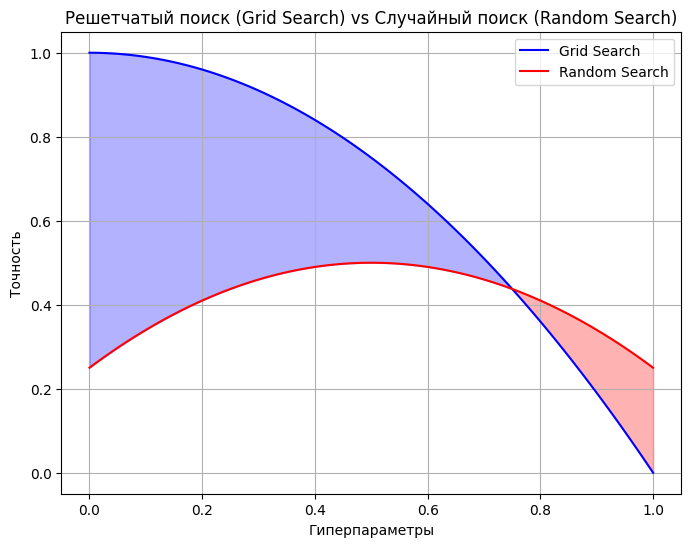

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Генерация данных
x = np.linspace(0, 1, 100)
y1 = -(x**2) + 1
y2 = -((x - 0.5) ** 2) + 0.5

# Визуализация
plt.figure(figsize=(8, 6))
plt.plot(x, y1, label="Grid Search", color="blue")
plt.plot(x, y2, label="Random Search", color="red")
plt.fill_between(x, y1, y2, where=(y1 > y2), interpolate=True, color="blue", alpha=0.3)
plt.fill_between(x, y1, y2, where=(y1 <= y2), interpolate=True, color="red", alpha=0.3)
plt.title("Решетчатый поиск (Grid Search) vs Случайный поиск (Random Search)")
plt.xlabel("Гиперпараметры")
plt.ylabel("Точность")
plt.legend()
plt.grid(True)
plt.savefig("comparison_plot.png")